In [110]:
# python version 2.9.6
# dependencies
import pandas as pd
import matplotlib.pyplot as plt
import gmaps
import numpy as np
from config import api_key

In [111]:
# File to load
file_to_load = "NYPD_Motor_Vehicle_Collisions_-_Crashes.csv"

# Read csv file and store into Pandas data frame
data_raw = pd.read_csv(file_to_load)

/Users/abeljrenteria/miniconda3/envs/PythonData/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [112]:
# Convert string date to Pandas DateTime type
data['DATE'] = pd.to_datetime(data['DATE'])

# Keep only data from 2018
data = data[(data['DATE'].dt.year == 2018)]

# Sort data based on date
data = data.sort_values(by='DATE', ascending=False)

In [113]:
# Get rid of Null Rows in columns 
data = data[pd.notnull(data['ZIP CODE'])]
data = data[pd.notnull(data['LATITUDE'])]
data = data[pd.notnull(data['LONGITUDE'])]
data = data[pd.notnull(data['BOROUGH'])]

In [114]:
# Combine columns
data['TOTAL PERSONS INJURED/KILLED'] = data["NUMBER OF PERSONS INJURED"] + data["NUMBER OF PERSONS KILLED"]
data['TOTAL PEDESTRIANS INJURED/KILLED'] = data["NUMBER OF PEDESTRIANS INJURED"] + data["NUMBER OF PEDESTRIANS KILLED"]
data['TOTAL CYCLIST INJURED/KILLED'] = data["NUMBER OF CYCLIST INJURED"] + data["NUMBER OF CYCLIST KILLED"]
data['TOTAL MOTORIST INJURED/KILLED'] = data["NUMBER OF MOTORIST INJURED"] + data["NUMBER OF MOTORIST KILLED"]

# Accidents at a glance
Create bar charts based on the following metrics
* Borough

In [116]:
# Count total number of accidents by year
total_accidents = len(data.index)

print(f'Total Accidents(2018): {total_accidents}')

Total Accidents(2018): 144735


In [117]:
# Borough
data_borough = data.groupby('BOROUGH')
data_borough.first()

,DATE,TIME,ZIP CODE,LATITUDE,LONGITUDE,LOCATION,ON STREET NAME,CROSS STREET NAME,OFF STREET NAME,NUMBER OF PERSONS INJURED,...,UNIQUE ID,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5,TOTAL PERSONS INJURED/KILLED,TOTAL PEDESTRIANS INJURED/KILLED,TOTAL CYCLIST INJURED/KILLED,TOTAL MOTORIST INJURED/KILLED
BOROUGH,,,,,,,,,,,,,,,,,,,,,
BRONX,2018-12-31,19:48,10454.0,40.803593,-73.919785,(-73.919785 40.803593),BRUCKNER BOULEVARD,SAINT ANNS AVENUE,1825 EASTCHESTER ROAD,0.0,...,4055766,Sedan,Station Wagon/Sport Utility Vehicle,Sedan,Sedan,Station Wagon/Sport Utility Vehicle,0.0,0,0,0
BROOKLYN,2018-12-31,10:34,11209.0,40.623596,-74.026560,(-74.02656 40.623596),EAST 3 STREET,FORT HAMILTON PARKWAY,449 84 STREET,0.0,...,4055463,Sedan,Sedan,Station Wagon/Sport Utility Vehicle,Station Wagon/Sport Utility Vehicle,Station Wagon/Sport Utility Vehicle,0.0,0,0,0
MANHATTAN,2018-12-31,19:00,10035.0,40.806915,-73.935570,(-73.93557 40.806915),EAST 129 STREET,LEXINGTON AVENUE,9 WEST 120 STREET,0.0,...,4055507,Sedan,Station Wagon/Sport Utility Vehicle,Sedan,Sedan,Sedan,0.0,0,0,0
QUEENS,2018-12-31,19:00,11373.0,40.744550,-73.873780,(-73.87378 40.74455),FORLEY STREET,LAMONT AVENUE,150-43 14 AVENUE,0.0,...,4055534,Sedan,Sedan,Station Wagon/Sport Utility Vehicle,Sedan,Sedan,0.0,0,0,0
STATEN ISLAND,2018-12-31,0:00,10305.0,40.593370,-74.089300,(-74.0893 40.59337),SOUTH RAILROAD AVENUE,COOPER AVENUE,1230 CASTLETON AVENUE,0.0,...,4055512,Station Wagon/Sport Utility Vehicle,Sedan,Station Wagon/Sport Utility Vehicle,Station Wagon/Sport Utility Vehicle,Station Wagon/Sport Utility Vehicle,0.0,0,0,0


In [118]:
#Borough Calculations

data_bronx = data_borough.get_group('BRONX')
data_brooklyn = data_borough.get_group('BROOKLYN')
data_manhattan = data_borough.get_group('MANHATTAN')
data_queens = data_borough.get_group('QUEENS')
data_staten = data_borough.get_group('STATEN ISLAND')


total_accidents_bronx = len(data_bronx.index)
total_accidents_brooklyn = len(data_brooklyn.index)
total_accidents_manhattan = len(data_manhattan.index)
total_accidents_queens = len(data_queens.index)
total_accidents_staten = len(data_staten.index)

print('Total Number of Accidents (2017 to 2018) - Borough')
print('-------------------------------------------------------')
print(f'Bronx: {total_accidents_bronx}')
print(f'Brooklyn: {total_accidents_brooklyn}')
print(f'Manhattan: {total_accidents_manhattan}')
print(f'Queens: {total_accidents_queens}')
print(f'Staten: {total_accidents_staten}\n')
print(f'Total: {total_accidents_bronx + total_accidents_brooklyn + total_accidents_manhattan + total_accidents_queens + total_accidents_staten}')
      

Total Number of Accidents (2017 to 2018) - Borough
-------------------------------------------------------
Bronx: 22160
Brooklyn: 46387
Manhattan: 29775
Queens: 40418
Staten: 5995

Total: 144735


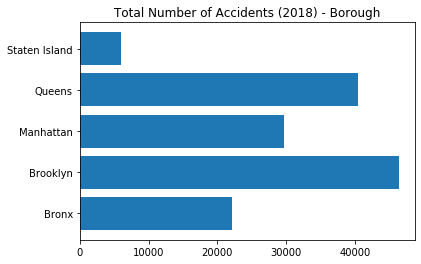

In [119]:
# Graph Borough Calculations
# Dataset
boroughs = ['Bronx', 'Brooklyn', 'Manhattan', 'Queens', 'Staten Island']
boroughs_accidents = [total_accidents_bronx, total_accidents_brooklyn, total_accidents_manhattan, total_accidents_queens, total_accidents_staten]
y_pos = np.arange(len(boroughs_accidents))

# Create horizontal bars
plt.barh(y_pos, boroughs_accidents)

# Create names on y-axis
plt.yticks(y_pos, boroughs)
plt.title('Total Number of Accidents (2018) - Borough')
plt.show()

In [120]:
# Total number of Persons Injured/Killed
total_inj_kill = data['TOTAL PERSONS INJURED/KILLED'].sum()
total_inj = data['NUMBER OF PERSONS INJURED'].sum()
total_kill = data['NUMBER OF PERSONS KILLED'].sum()


print(f'Total Persons Injured: {int(total_inj)}')
print(f'Total Persons Killed: {int(total_kill)}\n')
print(f'Total: {int(total_inj_kill)}')

Total Persons Injured: 36266
Total Persons Killed: 134

Total: 36394


In [121]:
# Total number of pedestrians Injured/Killed
total_ped_inj_kill = data['TOTAL PEDESTRIANS INJURED/KILLED'].sum()
total_ped_inj = data['NUMBER OF PEDESTRIANS INJURED'].sum()
total_ped_kill = data['NUMBER OF PEDESTRIANS KILLED'].sum()


print(f'Total PEDESTRIANS Injured: {int(total_ped_inj)}')
print(f'Total PEDESTRIANS Killed: {int(total_ped_kill)}\n')
print(f'Total: {int(total_ped_inj_kill)}')

Total PEDESTRIANS Injured: 8051
Total PEDESTRIANS Killed: 75

Total: 8126


In [122]:
# Total number of cyclists Injured/Killed
total_cycl_inj_kill = data['TOTAL CYCLIST INJURED/KILLED'].sum()
total_cycl_inj = data['NUMBER OF CYCLIST INJURED'].sum()
total_cycl_kill = data['NUMBER OF CYCLIST KILLED'].sum()


print(f'Total CYCLIST Injured: {int(total_cycl_inj)}')
print(f'Total CYCLIST Killed: {int(total_cycl_kill)}\n')
print(f'Total: {int(total_cycl_inj_kill)}')

Total CYCLIST Injured: 3331
Total CYCLIST Killed: 5

Total: 3336


In [123]:
# Total number of motorists Injured/Killed
total_motor_inj_kill = data['TOTAL MOTORIST INJURED/KILLED'].sum()
total_motor_inj = data['NUMBER OF MOTORIST INJURED'].sum()
total_motor_kill = data['NUMBER OF MOTORIST KILLED'].sum()


print(f'Total MOTORISTS Injured: {int(total_motor_inj)}')
print(f'Total MOTORISTS Killed: {int(total_motor_kill)}\n')
print(f'Total: {int(total_motor_inj_kill)}')

Total MOTORISTS Injured: 24874
Total MOTORISTS Killed: 53

Total: 24927


# Most Popular Accident Locations

In [140]:
# Top 10 locations in New York City with the most accidents
groupby_df = (data.groupby(['ON STREET NAME','CROSS STREET NAME'])['CROSS STREET NAME']
              .agg(['count']).sort_values(by='count', ascending=False).reset_index()
              .drop_duplicates('CROSS STREET NAME', keep='first'))
groupby_df.head(10)


,ON STREET NAME,CROSS STREET NAME,count
0,WEST 41 STREET,10 AVENUE,76
1,WEST FORDHAM ROAD,MAJOR DEEGAN EXPRESSWAY,68
2,EAST HOUSTON STREET,BOWERY,61
3,NORTH CONDUIT AVENUE,COHANCY STREET,61
4,EAST GUN HILL ROAD,BRONX RIVER PARKWAY,60
5,2 AVENUE,EAST 59 STREET,57
6,EAST 37 STREET,3 AVENUE,57
7,WEST 40 STREET,11 AVENUE,55
8,TILLARY STREET,FLATBUSH AVENUE EXTENSION,53
9,82 STREET,23 AVENUE,52


In [141]:
# Top 10 locations in Brooklyn with the most accidents
popular_spots_brooklyn = (data_brooklyn.groupby(['ON STREET NAME','CROSS STREET NAME'])['CROSS STREET NAME']
                          .agg(['count']).sort_values(by='count', ascending=False).reset_index()
                          .drop_duplicates('CROSS STREET NAME', keep='first'))
popular_spots_brooklyn.head(10)

,ON STREET NAME,CROSS STREET NAME,count
0,TILLARY STREET,FLATBUSH AVENUE EXTENSION,53
1,ATLANTIC AVENUE,LOGAN STREET,50
2,FLATBUSH AVENUE EXTENSION,TILLARY STREET,49
3,FLATBUSH AVENUE,ATLANTIC AVENUE,39
4,ATLANTIC AVENUE,EASTERN PARKWAY,38
5,FLATBUSH AVENUE,AVENUE U,37
6,ATLANTIC AVENUE,FLATBUSH AVENUE,37
7,FLATBUSH AVENUE EXTENSION,DE KALB AVENUE,36
8,EASTERN PARKWAY,HOWARD AVENUE,36
9,ATLANTIC AVENUE,BOERUM PLACE,36


In [142]:
# Top 10 locations in Bronx with the most accidents
popular_spots_bronx = (data_bronx.groupby(['ON STREET NAME','CROSS STREET NAME'])['CROSS STREET NAME']
                       .agg(['count']).sort_values(by='count', ascending=False).reset_index()
                       .drop_duplicates('CROSS STREET NAME', keep='first'))
popular_spots_bronx.head(10)

,ON STREET NAME,CROSS STREET NAME,count
0,WEST FORDHAM ROAD,MAJOR DEEGAN EXPRESSWAY,68
1,EAST GUN HILL ROAD,BRONX RIVER PARKWAY,60
2,BRUCKNER BOULEVARD,BRUSH AVENUE,40
3,BRUCKNER BOULEVARD,HUNTS POINT AVENUE,39
4,MAJOR DEEGAN EXPRESSWAY,WEST FORDHAM ROAD,36
5,HUNTS POINT AVENUE,BRUCKNER BOULEVARD,35
6,BRUCKNER BOULEVARD,BARRETTO STREET,34
7,BRUCKNER BOULEVARD,SAINT ANNS AVENUE,33
8,EAST 233 STREET,WEBSTER AVENUE,33
10,BRUCKNER BOULEVARD,TIFFANY STREET,32


In [143]:
# Top 10 locations in Bronx with the most accidents
popular_spots_staten = (data_staten.groupby(['ON STREET NAME','CROSS STREET NAME'])['CROSS STREET NAME']
                        .agg(['count']).sort_values(by='count', ascending=False).reset_index()
                        .drop_duplicates('CROSS STREET NAME', keep='first'))
popular_spots_staten.head(10)

,ON STREET NAME,CROSS STREET NAME,count
0,HYLAN BOULEVARD,NEW DORP LANE,26
1,RICHMOND ROAD,NARROWS ROAD NORTH,21
2,HYLAN BOULEVARD,LINCOLN AVENUE,18
3,HYLAN BOULEVARD,MIDLAND AVENUE,18
4,RICHMOND AVENUE,DRUMGOOLE ROAD WEST,18
6,NEW DORP LANE,HYLAN BOULEVARD,14
7,MILFORD DRIVE,CLOVE ROAD,13
8,RICHMOND AVENUE,ARTHUR KILL ROAD,13
9,NARROWS ROAD NORTH,RICHMOND ROAD,12
10,SLOSSON AVENUE,REON AVENUE,12


In [144]:
# Top 10 locations in Bronx with the most accidents
popular_spots_queens = (data_queens.groupby(['ON STREET NAME','CROSS STREET NAME'])['CROSS STREET NAME']
                        .agg(['count']).sort_values(by='count', ascending=False).reset_index()
                        .drop_duplicates('CROSS STREET NAME', keep='first'))
popular_spots_queens.head(10)

,ON STREET NAME,CROSS STREET NAME,count
0,NORTH CONDUIT AVENUE,COHANCY STREET,61
1,82 STREET,23 AVENUE,51
2,ROCKAWAY BOULEVARD,FARMERS BOULEVARD,51
3,NORTH CONDUIT AVENUE,LEFFERTS BOULEVARD,49
4,ROCKAWAY BOULEVARD,BREWER BOULEVARD,49
5,QUEENS BOULEVARD,WOODHAVEN BOULEVARD,47
6,NORTH CONDUIT AVENUE,134 STREET,47
7,WOODHAVEN BOULEVARD,QUEENS BOULEVARD,45
8,QUEENS BOULEVARD,SKILLMAN AVENUE,44
9,NORTHERN BOULEVARD,CROSS ISLAND PARKWAY,43


In [145]:
# Top 10 locations in Manhattan with the most accidents
popular_spots_manhattan = (data_manhattan.groupby(['ON STREET NAME','CROSS STREET NAME'])['CROSS STREET NAME']
                           .agg(['count']).sort_values(by='count', ascending=False).reset_index()
                           .drop_duplicates('CROSS STREET NAME', keep='first'))
popular_spots_manhattan.head(10)

,ON STREET NAME,CROSS STREET NAME,count
0,WEST 41 STREET,10 AVENUE,76
1,EAST HOUSTON STREET,BOWERY,61
2,2 AVENUE,EAST 59 STREET,57
3,EAST 37 STREET,3 AVENUE,57
4,WEST 40 STREET,11 AVENUE,55
6,WEST STREET,MORRIS STREET,43
7,WEST 42 STREET,DYER AVENUE,42
8,10 AVENUE,WEST 41 STREET,42
9,11 AVENUE,WEST 40 STREET,41
10,DELANCEY STREET,ALLEN STREET,39


# Heatmap

In [130]:
# Configure gmaps
gmaps.configure(api_key=api_key)

# extract location data and weights from dataframe
locations = data[['LATITUDE', 'LONGITUDE']]
total_person_weight = data['TOTAL PERSONS INJURED/KILLED']

In [131]:
# gmaps - heatmap
def drawHeatMap(location, val, zoom, intensity, radius):
    heatmap_layer = gmaps.heatmap_layer(locations, val + 3, dissipating = True)
    heatmap_layer.max_intensity = intensity
    heatmap_layer.point_radius = radius
    fig = gmaps.figure()
    fig = gmaps.figure(center = (40.7128, -74.0060), zoom_level=zoom)
    fig.add_layer(heatmap_layer)
    return fig

zoom = 10
intensity = 100
radius = 10

In [132]:

nyc_heatmap = drawHeatMap(locations, total_person_weight, zoom, intensity, radius)
nyc_heatmap

Figure(layout=FigureLayout(height='420px'))

# Analysis by Pedestrians, Cyclists, and Motorist

### Pedestrians 

In [133]:
# Pedestrians
data_pedestrians = data[data['TOTAL PEDESTRIANS INJURED/KILLED'] != 0]

# Most dangerous locations in New York City where pedestrians were injured/killed
group_ped = (data_pedestrians.groupby(['ON STREET NAME','CROSS STREET NAME'])['CROSS STREET NAME'].agg(['count']).sort_values(by='count', ascending=False).reset_index().drop_duplicates('CROSS STREET NAME', keep='first'))
group_ped.head(10)

,ON STREET NAME,CROSS STREET NAME,count
0,ATLANTIC AVENUE,LOGAN STREET,7
1,BROADWAY,CHAMBERS STREET,6
2,EAST 125 STREET,LEXINGTON AVENUE,6
3,FLATBUSH AVENUE,AVENUE H,5
4,108 STREET,63 DRIVE,5
5,WESTCHESTER AVENUE,JACKSON AVENUE,5
6,FLATBUSH AVENUE,AVENUE U,5
7,EAST 149 STREET,BERGEN AVENUE,4
8,3 AVENUE,EAST 42 STREET,4
9,NORTHERN BOULEVARD,UNION STREET,4


In [134]:
# Heatmap for pedestrians locations injured/killed
zoom = 10
intensity = 20
radius = 20
locations = data_pedestrians[['LATITUDE', 'LONGITUDE']]
total_pedestrians_weight = data_pedestrians['TOTAL PEDESTRIANS INJURED/KILLED']
pedestrians_heatmap = drawHeatMap(locations, total_pedestrians_weight, zoom, intensity, radius)
pedestrians_heatmap

Figure(layout=FigureLayout(height='420px'))

In [135]:
#Borough Break Down
#Most dangerous locations in Manhattan for pedestrian accidents
data_manhattan_pedestrians = data_manhattan[data_manhattan['TOTAL PEDESTRIANS INJURED/KILLED'] != 0]
manhattan_ped = (data_manhattan_pedestrians.groupby(['ON STREET NAME','CROSS STREET NAME'])['CROSS STREET NAME'].agg(['count']).sort_values(by='count', ascending=False).reset_index().drop_duplicates('CROSS STREET NAME', keep='first'))

# Most dangerous locations in Brooklyn for pedestrian accidents
data_brooklyn_pedestrians = data_brooklyn[data_brooklyn['TOTAL PEDESTRIANS INJURED/KILLED'] != 0]
brooklyn_ped = (data_brooklyn_pedestrians.groupby(['ON STREET NAME','CROSS STREET NAME'])['CROSS STREET NAME'].agg(['count']).sort_values(by='count', ascending=False).reset_index().drop_duplicates('CROSS STREET NAME', keep='first'))

# Most dangerous locations in Queens for pedestrian accidents
data_queens_pedestrians = data_queens[data_queens['TOTAL PEDESTRIANS INJURED/KILLED'] != 0]
queens_ped = (data_queens_pedestrians.groupby(['ON STREET NAME','CROSS STREET NAME'])['CROSS STREET NAME'].agg(['count']).sort_values(by='count', ascending=False).reset_index().drop_duplicates('CROSS STREET NAME', keep='first'))

# Most dangerous locations in Bronx for pedestrian accidents
data_bronx_pedestrians = data_bronx[data_bronx['TOTAL PEDESTRIANS INJURED/KILLED'] != 0]
bronx_ped = (data_bronx_pedestrians.groupby(['ON STREET NAME','CROSS STREET NAME'])['CROSS STREET NAME'].agg(['count']).sort_values(by='count', ascending=False).reset_index().drop_duplicates('CROSS STREET NAME', keep='first'))



### Cyclist 

In [136]:
# Cyclist
data_cyclist = data[data['TOTAL CYCLIST INJURED/KILLED'] != 0]

# Most dangerous locations in New York City where cyclist were injured/killed
group_cyclist = (data_cyclist.groupby(['ON STREET NAME','CROSS STREET NAME'])['CROSS STREET NAME'].agg(['count']).sort_values(by='count', ascending=False).reset_index().drop_duplicates('CROSS STREET NAME', keep='first'))
group_cyclist.head(10)

,ON STREET NAME,CROSS STREET NAME,count
0,CHRYSTIE STREET,GRAND STREET,4
1,1 AVENUE,EAST 77 STREET,3
2,9 AVENUE,WEST 42 STREET,3
3,EAST 34 STREET,CHURCH AVENUE,3
4,34 AVENUE,103 STREET,3
5,WEST 29 STREET,8 AVENUE,3
6,GRAND STREET,CHRYSTIE STREET,3
7,DE KALB AVENUE,SOUTH PORTLAND AVENUE,3
8,CHAMBERS STREET,CHURCH STREET,3
9,EAST 86 STREET,1 AVENUE,3


In [137]:
# Heatmap for cyclist locations injured/killed
zoom = 10
intensity = 20
radius = 20
locations = data_cyclist[['LATITUDE', 'LONGITUDE']]
total_cyclist_weight = data_cyclist['TOTAL CYCLIST INJURED/KILLED']
cyclist_heatmap = drawHeatMap(locations, total_cyclist_weight, zoom, intensity, radius)
cyclist_heatmap

Figure(layout=FigureLayout(height='420px'))

### Motorist

In [138]:
# Motorist
data_motorist = data[data['TOTAL MOTORIST INJURED/KILLED'] != 0]

# Most dangerous locations in New York City where motorist were injured/killed
group_motorist = (data_motorist.groupby(['ON STREET NAME','CROSS STREET NAME'])['CROSS STREET NAME'].agg(['count']).sort_values(by='count', ascending=False).reset_index().drop_duplicates('CROSS STREET NAME', keep='first'))
group_motorist.head(10)

,ON STREET NAME,CROSS STREET NAME,count
0,WEST FORDHAM ROAD,MAJOR DEEGAN EXPRESSWAY,19
1,ROCKAWAY BOULEVARD,FARMERS BOULEVARD,16
2,ROCKAWAY BOULEVARD,BREWER BOULEVARD,14
3,ATLANTIC AVENUE,LOGAN STREET,13
4,EASTERN PARKWAY,BUFFALO AVENUE,12
5,MAJOR DEEGAN EXPRESSWAY,WEST FORDHAM ROAD,10
6,NORTH CONDUIT AVENUE,LEFFERTS BOULEVARD,10
7,QUEENS BOULEVARD,SKILLMAN AVENUE,10
8,EAST GUN HILL ROAD,BRONX RIVER PARKWAY,10
9,PELHAM PARKWAY,SHORE ROAD,10


In [139]:
# Heatmap for motorist locations injured/killed
zoom = 10
intensity = 20
radius = 20
locations = data_motorist[['LATITUDE', 'LONGITUDE']]
total_motorist_weight = data_motorist['TOTAL MOTORIST INJURED/KILLED']
motorist_heatmap = drawHeatMap(locations, total_motorist_weight, zoom, intensity, radius)
motorist_heatmap

Figure(layout=FigureLayout(height='420px'))